# Assignment 1

**Due 18 September 2017 before 11:59:59PM**

**Remember** always start work at the top of the notebook.

In [15]:
# Put your onyen between the quotes
Author = 'jcaldous'

# If you have no collaborators then remove all the strings from this list
# it should look like Collaborators = [ ]
Collaborators = [ ]

## Introduction

This assignment involves working with and plotting data in arrays. You will complete this assignment by working in this notebook. When you are finished you will submit your notebook using the button that will appear below. 

I have completed several parts of the assignment for you. You should study these parts but do not modify them. You'll have to do similar things for yourself in future assignments. 

## Learning Objective

In this assignment you will learn to use the powerful array operations that are provided by Numpy. Given real data you will answer questions of scientific interest. 

In order to maximize your learning about Numpy arrays you are prohibited from using any sort of looping constructs for solving these problems.

## Setup

In [2]:
# first we include some boilerplate to setup the environment.
# Do NOT change any of this

# this first line makes our graphs appear inline in the notebook
%matplotlib inline

# these next lines make the array and plotting modules available
import numpy as np
import pylab

# we use checker to provide feedback, you wouldn't use it in a real application
import comp116

check, report = comp116.start('A1')

First we will read several data sets from files. These datasets are:

* Monthly Jordan and Falls Lake data (from Army Corps of Engineers)
  * `depth`: a 240&Cross;2 array with depth in feet of Jordan and Falls lakes for each month from Jan 1985 to Dec 2004, which is 20 years.
  * `rain`: a 240&Cross;2 array with total rainfall in inches for each month again starting in Jan 1985.
* Daily Haw river and Jordan Lake data (from USGS)
  * `hawgage`: a 365&Cross;4 array of daily average river or lake height in feet at Haw River, Bynum, and above & below the Jordan Lake Dam by Moncure. (These sites are listed upstream to downstream, but the gauges are not in that order.)
  * `hawrain`: a 365&Cross;2 array of daily rainfall in inches measured at two rain gauges from 29 Aug 07 to 28 Aug 08.

In [3]:
# we are providing this code for you. Later you'll need to do this yourself
depth = np.loadtxt('depth.txt')
rain = np.loadtxt('rain.txt')
hawgage = np.loadtxt('hawgage.txt')
hawrain = np.loadtxt('hawrain.txt')

<img src="files/plot1.png" width="300" style="float: right" />

## Things to do with the Monthly Jordan and Falls Lake data

**1) Plot a line graph of depths for both lakes. The graph you produce should look like the figure to the right.**

Part 1 plot appears correct


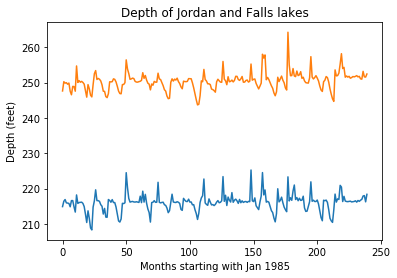

In [4]:
# put your code here to plot the line graph of depths over time.
pylab.plot(depth)
# these show how to label the figure
# do not modify these
pylab.title('Depth of Jordan and Falls lakes')
pylab.ylabel('Depth (feet)')
pylab.xlabel('Months starting with Jan 1985')

check('Part 1 plot', pylab.gcf(), points=10)

**2) The target depths for Jordan and Falls lakes are 216 feet and 251.5 feet, respectively.  For how many months was each lake over its target?**


In [5]:
# include the code here to compute and print the answer.

JordanOverTarget = np.count_nonzero(depth[:,0]>216) # replace this with some expression
FallsOverTarget = np.count_nonzero(depth[:,1]>251.5) # replace this with some expression

print('Months Jordan lake was over its target =', JordanOverTarget)
print('Months Falls lake was over its target =', FallsOverTarget)

check('JordanOverTarget', JordanOverTarget, points=5)
check('FallsOverTarget', FallsOverTarget, points=5)

Months Jordan lake was over its target = 154
Months Falls lake was over its target = 59
JordanOverTarget appears correct
FallsOverTarget appears correct


<img src="files/plot3.png" width="300" style="float: right" />

**3) Plot the rain in August as a line graph over years for both lakes. Set the title to 'Rain in August for Jordan and Falls lakes'. Label the x axis 'Years since 1985'. Label the y axis 'Inches'. It should look like the figure to the right.**



Part 3 plot appears correct


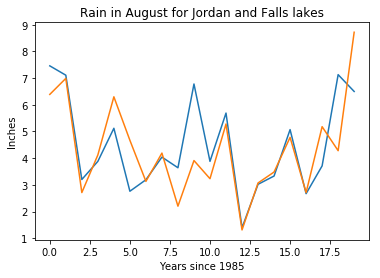

In [6]:
# include code to plot the figure with some nice labels as above
pylab.plot(rain[7::12])
pylab.title('Rain in August for Jordan and Falls lakes')
pylab.ylabel('Inches')
pylab.xlabel('Years since 1985')
check('Part 3 plot', pylab.gcf(), points=10)

<img src="files/plot4.png" width="300" style="float: right" />

**4) Compute the average height that Falls Lake is above its target for each month over the 20 years from 1985-2004, and display as bar chart with a bar for each month.  Plot the line for 2004 in red on top of this bar chart. Again, it should look like the sample to the right. Note their are two parts, computing a value and plotting the red line.**

Hint: You can reshape the 1-D array of monthly depths into a 2-D array with one row per year. Then, you can take the mean down the columns to get the monthly means.

Part 4 plot appears correct


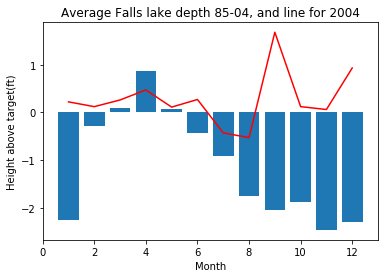

In [7]:
Falls = depth[:,1]
# put code here to compute FallsByMonth
FallsByMonth = (np.reshape(Falls, (20,12))) 
Fallsminustarget= FallsByMonth-251.5 # replace this with code to compute the value
BarGraph= np.sum(Fallsminustarget, axis=0)/20

# then you can create a bar chart of it like this:
pylab.bar(np.arange(1,13), BarGraph, align='center')

# then plot a line in red on top of that with a call to plot like this:
# pylab.plot(np.arange(1,13), somethinggoeshere, 'r')
# Put your code here, the comment above is a hint at what you need.
Data_2004 = FallsByMonth[-1,:]-251.5
pylab.plot(np.arange(1,13),Data_2004,'r')
pylab.title('Average Falls lake depth 85-04, and line for 2004')
pylab.ylabel('Height above target(ft)')
pylab.xlabel('Month')

check('Part 4 plot', pylab.gcf(), points=10)


In [8]:
FallsByMonth[-1,:]

array([ 251.72,  251.62,  251.76,  251.97,  251.61,  251.77,  251.07,
        250.97,  253.18,  251.62,  251.56,  252.43])

## Things to do with the daily Haw river/Jordan Lake data

**5) Determine how many days had more than 1 inch of precipitation at **either** of the sites in hawrain, and how many days had less than 1/4 inch at **both** sites.**

In [9]:
# your code goes here
daysover = np.sum(np.any(hawrain>1, axis =1)) # replace this with some expression
daysunder = np.sum(np.all(hawrain<1/4, axis=1)) # replace this with some expression

# then we will print the results
print('Days with more than 1 inch of rain at either =', daysover)
print('Days with less than 1/4 inch of rain at both =', daysunder)

# test code below here
check('Days over 1 inch at either', daysover, points=5)
check('Days under 1/4 inch at both', daysunder, points=5)


Days with more than 1 inch of rain at either = 10
Days with less than 1/4 inch of rain at both = 314
Days over 1 inch at either appears correct
Days under 1/4 inch at both appears correct


<img src="files/plot6.png" width="300" style="float: right" />

**6) Plot line graphs showing the cumulative amount of rain over the past year at both sites. Set the title to 'Cumulative Rainfall', label the X axis 'Days since 28Aug07', and label the Y axis 'Cumulative rainfall (in)'.**

Part 6 plot appears correct


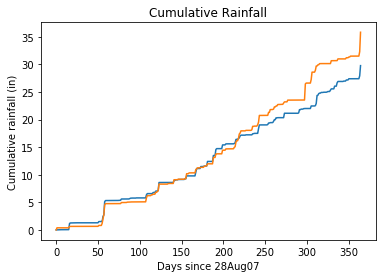

In [10]:
#  # replace this with your code to compute the answer
pylab.plot(np.cumsum(hawrain,axis=0))
pylab.title('Cumulative Rainfall')
pylab.ylabel('Cumulative rainfall (in)')
pylab.xlabel('Days since 28Aug07')
check('Part 6 plot', pylab.gcf(), points=10)

In [11]:
np.cumsum(hawrain, axis=1)

array([[ 0.  ,  0.  ],
       [ 0.01,  0.39],
       [ 0.01,  0.01],
       [ 0.  ,  0.  ],
       [ 0.01,  0.01],
       [ 0.  ,  0.  ],
       [ 0.01,  0.01],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.01,  0.01],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 1.12,  1.37],
       [ 0.09,  0.1 ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.01,  0.01],
       [ 0.  ,  0.  ],
       [ 0.01,  0.01],
       [ 0.01,  0.02],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.  ,  0.  ],
       [ 0.

<img src="files/plot7.png" width="300" style="float: right" />

**7) Determine the lowest height for each gauge in hawgage, and create an array of adjusted heights by subtracting the corresponding lowest heights. Plot these adjusted heights as a line graph. Set the title to 'Adjusted gauge heights', x axis label 'Days since 28Aug07', and y axis label 'Height above min (ft)'.**

Part 7 adjusted height appears correct
Part 7 plot appears correct


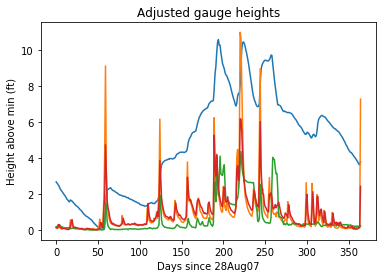

In [12]:
adjusted_heights = hawgage-np.min(hawgage, axis=0) # replace this with your code to compute the answer
pylab.plot(adjusted_heights)
pylab.title('Adjusted gauge heights')
pylab.ylabel('Height above min (ft)')
pylab.xlabel('Days since 28Aug07')
check('Part 7 adjusted height', adjusted_heights, points=10)
check('Part 7 plot', pylab.gcf(), points=10)

**8) Determine the maximum increase and maximum decrease in height from one day to the next for each of the four gauges in hawgage. Print the most positive change (maximum increase) for the 4 gages and the most negative change (maximum decrease).**

In [13]:
max_increase = np.max(np.diff(hawgage, axis=0)) # replace this with your code to compute the answer
max_decrease = np.min(np.diff(hawgage,axis=0)) # replace this with your code to compute the answer


print('Maximum one-day increase in height =', max_increase)
print('Minimum one-day decrease in height =', max_decrease)

check('Part 8 max increase', max_increase, points=10)
check('Part 8 max decrease', max_decrease, points=10)


Maximum one-day increase in height = 7.15
Minimum one-day decrease in height = -6.22
Part 8 max increase appears correct
Part 8 max decrease appears correct


In [16]:
# don't change this, the values come from the first cell of this notebook.
report(Author, Collaborators)

Days over 1 inch at either appears correct
Days under 1/4 inch at both appears correct
FallsOverTarget appears correct
JordanOverTarget appears correct
Part 1 plot appears correct
Part 3 plot appears correct
Part 4 plot appears correct
Part 6 plot appears correct
Part 7 adjusted height appears correct
Part 7 plot appears correct
Part 8 max decrease appears correct
Part 8 max increase appears correct
Report for jcaldous
  Collaborators: []
  12.0 of 12 possibly correct for up to 100.0 of 100 points
